In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Dict

### step function

In [2]:
def py_step_function(x: int) -> int:
    if x > 0:
        return 1
    else:
        return 0

In [3]:
py_step_function(5)

1

In [4]:
def np_step_function(x: npt.NDArray[np.float64]) -> npt.NDArray[np.int32]:
    y = x > 0
    return y.astype(np.int32)

In [5]:
x = np.array([-1.0, 1.0, 2.0])
np_step_function(x)

array([0, 1, 1])

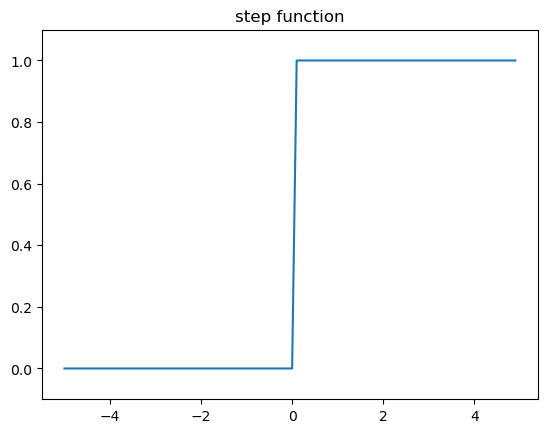

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = np_step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('step function')
plt.show()

### sigmoid function

In [7]:
def np_sigmoid(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
np_sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

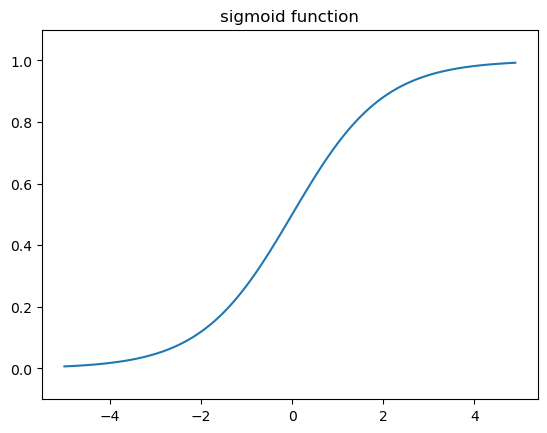

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = np_sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('sigmoid function')
plt.show()

### "step function" VS "sigmoid function"

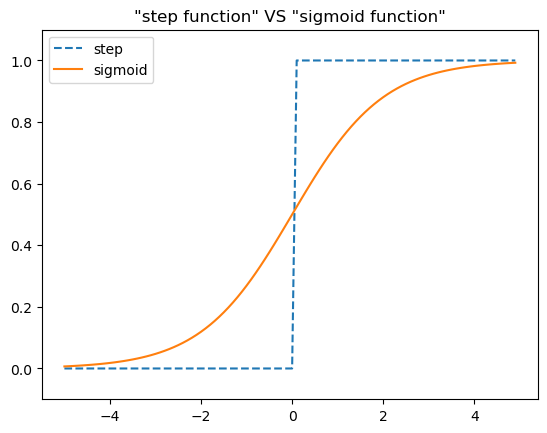

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
step_y = np_step_function(x)
sigmoid_y = np_sigmoid(x)

plt.plot(x, step_y, '--')
plt.plot(x, sigmoid_y)
plt.ylim(-0.1, 1.1)
plt.title('"step function" VS "sigmoid function"')
plt.legend(['step', 'sigmoid'])
plt.show()

### ReLU (Rectified Linear Unit)

In [11]:
def np_relu(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return np.maximum(0, x)

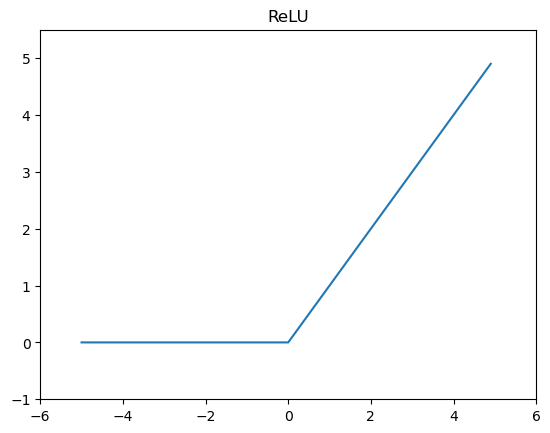

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = np_relu(x)

plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-1, 5.5)
plt.title('ReLU')
plt.show()

### matrix multiplication

In [13]:
A = np.array([[1,2], 
              [3,4]])
print(A.ndim)
print(A.shape)

B = np.array([[5,6], 
              [7,8]])
print(B.ndim)
print(B.shape)

# The commutative law of multiplication is not always True.
print(np.dot(A, B))
print(np.dot(B, A))

2
(2, 2)
2
(2, 2)
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


### The three-layer Neural Network

In [14]:
# The identity function is a activation function in regression problem.
def np_identity_function(x: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    return x

In [15]:
def init_network() -> Dict[str, npt.NDArray[np.float64]]:
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = np_sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = np_sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = np_identity_function(a3)

    return y

In [16]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### softmax function

In [17]:
def np_softmax(a: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    # Using variable c to prevent overflow value.
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [18]:
a = np.array([0.3, 2.9, 4.0])
y = np_softmax(a)
print(y)

# A sum of softmax function result is 1.
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


### Classification in MNIST dataset

In [19]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import pickle

In [20]:
# Using Keras library instead of the original code since Yann's MNIST homepage has a 403 forbidden error.
(x_train, t_train), (x_test, t_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
def img_show(img: npt.NDArray[np.int8]):
    pil_img = Image.fromarray(img)
    display(pil_img)

In [22]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
print(img.shape[0] * img.shape[1])

img_show(img)

5
(28, 28)
784


In [23]:
def get_data():
    _ , (x_test, t_test) = keras.datasets.mnist.load_data()
    
    # normalize
    x_test = x_test.astype(np.float32) 
    x_test /= 255.0

    # flatten
    x_test = x_test.reshape(-1, 784)

    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = np_sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = np_sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = np_softmax(a3)

    return y

In [24]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
